In [416]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [417]:
#to find distance between 2 pts.

def norm(u,v):
    l = 0
    for i in range(len(u)):
        l += (u[i] - v[i])**2
    return(np.sqrt(l))

In [418]:
dataset = pd.read_csv("/content/data.csv")
dataset

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0
...,...,...,...
331,638.916471,323.569096,1
332,542.005901,347.527070,0
333,611.964612,377.254978,0
334,520.654168,455.996453,0


In [419]:
#checking for null values
dataset.isna().sum()

x        0
y        0
color    0
dtype: int64

In [420]:
#converted to np array, dropped the 3rd feature and viewing first 100 entries

x = dataset.to_numpy()
x = np.delete(x,2,axis = 1)
x[:10][:]




array([[516.01270584, 393.01451385],
       [436.21176221, 408.65658486],
       [512.05260123, 372.02201357],
       [489.14046445, 401.80715936],
       [446.20798589, 338.51668221],
       [516.41439428, 354.1946332 ],
       [499.38635309, 414.43229606],
       [489.31393714, 408.06659564],
       [440.10939244, 394.82167659],
       [444.11917081, 367.85030508]])

In [442]:
#initialising k centroids
k = np.random.randint(2,5)
k

4

In [448]:
#placing k centroids at random places
centroids = np.zeros([k,2])

for i in range(k):
  centroids[i,0] = np.random.uniform(400,700)
  centroids[i][1] = np.random.uniform(200,500)
centroids

array([[581.8332746 , 354.03533898],
       [439.53161622, 470.61524303],
       [652.87252921, 489.95696127],
       [675.98283405, 375.9005112 ]])

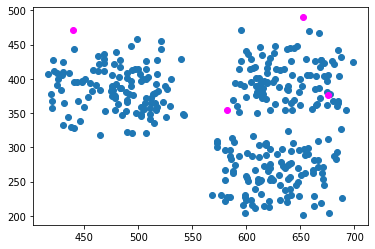

In [449]:
#plotting the dataset and the cluster centroids
def plot():
  plt.scatter(x[:,0],x[:,1])
  plt.scatter(centroids[:,0], centroids[:,1], color = "magenta")
  plt.show

plot()

In [ ]:
#assgning closest centroids to the pt.s

def assign_centroid(x,centroids):
  
  global closest
  closest = np.zeros([len(x),1])

  for i in range(len(x)):
        
    dist = np.zeros([k,1])
    for j in range(k):
      dist[j] = norm(x[i], centroids[j])
    closest[i] = np.argmin(dist)

assign_centroid(x,centroids)
closest,centroids

In [469]:
#moving centroids to mean position

def move(centroids,x,closest):


  for i in range(len(centroids)):
    centroids[i] = 0
    count = 0
    for j in range(len(closest)):
      if (closest[j] == i):
        centroids[i] += x[j]
        count += 1
    if (count==0):
      pass
    else:
      centroids[i] /= count

move(centroids,x,closest)

array([[624.32951055, 260.93147428],
       [480.60429976, 385.44506433],
       [632.30836663, 411.86995613],
       [652.35690574, 358.1540625 ]])

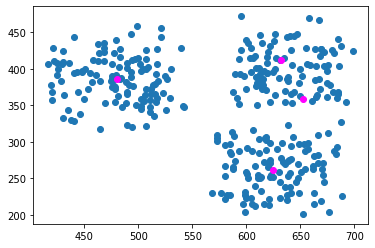

In [470]:
plot()
centroids



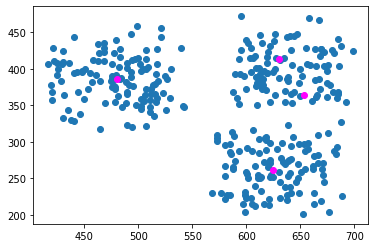

In [477]:
# running algorithm for 5 iterations

iterations = 5
for i in range(iterations):

  assign_centroid(x,centroids)
  move(centroids,x,closest)

plot()